# MOwNiT 

## Laboratorium 4

### Interpolacja

(dotyczy lokalnego uruchomienia) przed uruchomieniem trzeba zainstalować pakiet:

```julia
Pkg.add("Interpolations")
```

In [3]:
import Pkg
# Pkg.add("Interpolations")

    Updating registry at `C:\Users\Domin\.julia\registries\General.toml`


   Resolving package versions...


   Installed WoodburyMatrices ─ v0.5.5


   Installed Adapt ──────────── v3.6.1
   Installed StaticArraysCore ─ v1.4.0
   Installed AxisAlgorithms ─── v1.0.1
   Installed Ratios ─────────── v0.4.3


   Installed StaticArrays ───── v1.5.19


   Installed OffsetArrays ───── v1.12.9


   Installed Interpolations ─── v0.14.7


    Updating `C:\Users\Domin\.julia\environments\v1.8\Project.toml`
  [a98d9a8b] + Interpolations v0.14.7
    Updating `C:\Users\Domin\.julia\environments\v1.8\Manifest.toml`


  [79e6a3ab] + Adapt v3.6.1
  [13072b0f] + AxisAlgorithms v1.0.1
  [a98d9a8b] + Interpolations v0.14.7
  [6fe1bfb0] + OffsetArrays v1.12.9
  [c84ed2f1] + Ratios v0.4.3
  [90137ffa] + StaticArrays v1.5.19
  [1e83bf80] + StaticArraysCore v1.4.0
  [efce3f68] + WoodburyMatrices v0.5.5
  [8ba89e20] + Distributed
  [1a1011a3] + SharedArrays


Precompiling 

project...


  ✓ WoodburyMatrices


  ✓ Ratios
  ✓ StaticArraysCore
  ✓ Adapt


  ✓ AxisAlgorithms


  ✓ OffsetArrays


  ✓ StaticArrays


  ✓ Interpolations
  8 dependencies successfully precompiled in 14 seconds. 150 already precompiled.


In [4]:
# wylosowanie węzłów interpolacji
xs =  1:1:10
ys = [rand() for x in xs]

10-element Vector{Float64}:
 0.34209303801049507
 0.24716161148438665
 0.9252794824015238
 0.2625552649752879
 0.08357693453674786
 0.45435320862555517
 0.626800931495857
 0.9734789598130192
 0.4379071712245932
 0.5982843298236562


(process:2516): GLib-GIO-WARNING **: 13:47:36.668: Failed to open application manifest `C:\Windows\SystemApps\Microsoft.Windows.Search_cw5n1h2txyewy\AppxManifest.xml' for package #0 (`Microsoft.Windows.Search_1.16.0.22000_neutral_neutral_cw5n1h2txyewy'): error code 0x2


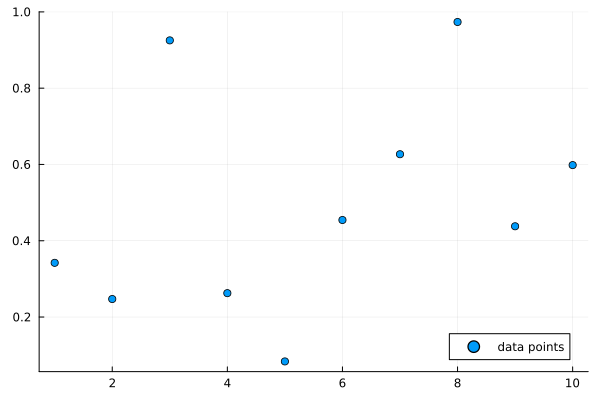

In [5]:
using Plots
scatter(xs,ys, label="data points")

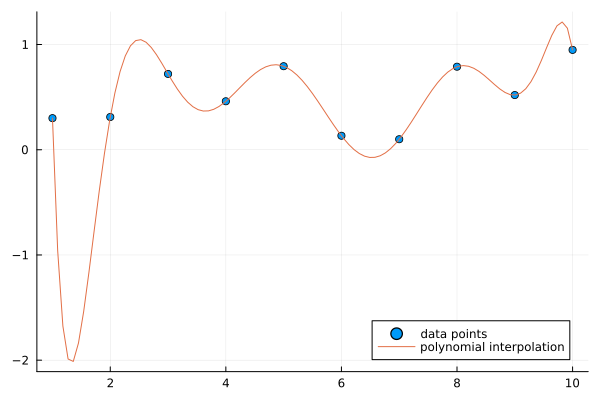

In [3]:
# interpolacja wielomianowa w pakiecie Polynomials
# https://juliamath.github.io/Polynomials.jl/stable/
#import Pkg; Pkg.add("Polynomials")
using Polynomials
f=fit(xs, ys)
plot!(f,  extrema(xs)..., label="polynomial interpolation")

In [6]:
# gęste punkty do rysowania wykresów funkcji interpolujacych
xsf=1:0.01:10

1.0:0.01:10.0

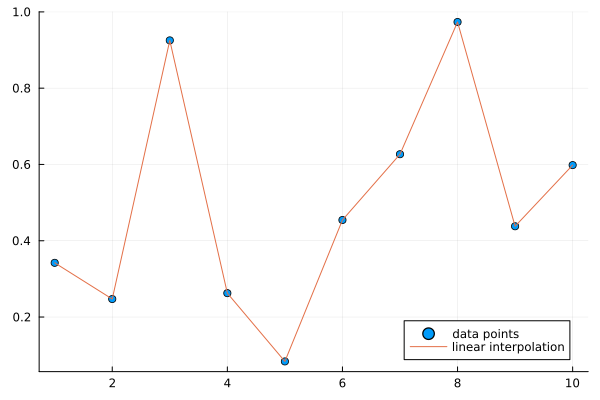

In [7]:
#  interpolacja liniowa z pakietu Interpolations - przykład
using Interpolations
interp_linear = LinearInterpolation(xs, ys)
ysf=[interp_linear(x) for x in xsf]
plot!(xsf,ysf, label="linear interpolation")

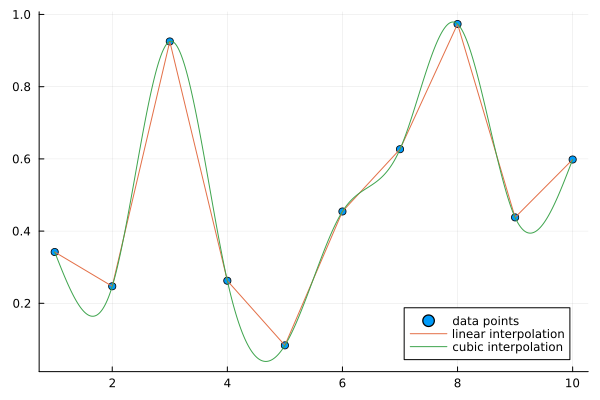

In [9]:
#  interpolacja szescienna 
interp_cubic = CubicSplineInterpolation(xs, ys)
ysf2=[interp_cubic(x) for x in xsf]
plot!(xsf,ysf2, label="cubic interpolation")

In [10]:
#Interpolacja szescienna to BSpline z warunkami brzegowymi Line i OnGrid. 
#Więcej o konfiguracji warunkow brzegowych w
# dokumentacji https://github.com/JuliaMath/Interpolations.jl/blob/master/doc/Interpolations_algebra.pdf
interp_cubic

10-element extrapolate(scale(interpolate(OffsetArray(::Vector{Float64}, 0:11), BSpline(Cubic(Line(OnGrid())))), (1:1:10,)), Throw()) with element type Float64:
 0.34209303801049507
 0.24716161148438662
 0.9252794824015239
 0.26255526497528797
 0.08357693453674785
 0.45435320862555517
 0.626800931495857
 0.9734789598130194
 0.4379071712245932
 0.5982843298236562

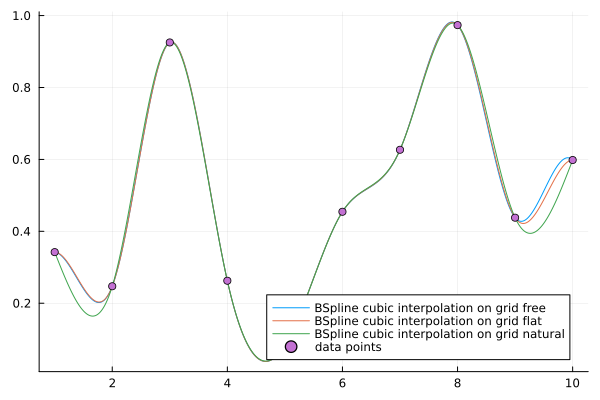

In [11]:
# Przyklad konfiguracji  BSpline-ów
itp = interpolate(ys, BSpline(Cubic(Free(OnGrid()))))
ysf3=[itp(x) for x in xsf]
plot(xsf,ysf3, label="BSpline cubic interpolation on grid free")
itp = interpolate(ys, BSpline(Cubic(Flat(OnGrid()))))
ysf3=[itp(x) for x in xsf]
plot!(xsf,ysf3, label="BSpline cubic interpolation on grid flat")
itp = interpolate(ys, BSpline(Cubic(Natural(OnGrid()))))
ysf3=[itp(x) for x in xsf]
plot!(xsf,ysf3, label="BSpline cubic interpolation on grid natural")

scatter!(xs,ys, label="data points")



### Zadania
1. Napisać własną implementację interpolacji wielomianowej stosując wprost wzór na wielomian interpolacyjny  Lagrange'a .  Przetestować swoją implementację na wylosowanych węzłach interpolacji w wybranym przedziale. Narysować wykres wielomianu interpolacyjnego w tym przedziale wraz z wezlami interpolacji. <b>(1 pkt)</b>

1. Zrobic to samo dla metody  Newtona (metoda ilorazów róznicowych).Narysować wykres wielomianu interpolacyjnego otrzymanego metodą Newtona dla tych samych danych, co w poprzednim punkcie. Zadbać o to, żeby ilorazy wyliczać tylko raz dla danego zbioru wezłow interpolacji, według schematu z pakietu Interpolations http://juliamath.github.io/Interpolations.jl/stable/interpolations/ : 
   1. napisać funkcję `NewtonInterpolation`, która wylicza ilorazy różnicowe i zwraca "obiekt interpolacyjny" `newt`
   1. napisać funkcję która wylicza wartość wielomianu dla obiektu `newt` w punkcie x za pomocą  <b>schematu Hornera dla postaci Newtona </b> <b>(2 pkt)</b>

1. Zastosować interpolację wielomianową z pakietu Polynomials do tych samych danych, co w poprzednich punktach. Porównać wszystkie 3 wyniki interpolacji wielomianowej na jednym wykresie. Co zauważamy? Dlaczego? <b>(1 pkt)</b>

1. Porównać metody poprzez pomiar czasu wykonania dla zmiennej ilości węzłow interpolacji. Uwaga: dodatkowo, dla metody Newtona i pakietu Polynomials należy osobno zmierzyć czas wyliczania wielomianu i osobno czas wyliczania wartości w punkcie. Dokonać pomiaru 10 razy i policzyć wartość średnią oraz oszacować błąd pomiaru za pomocą odchylenia standardowego; wyniki przedstawić na wykresach. <b>(2 pkt)</b>

1. Zaimplementować algorytm Neville’a i sprawdzić (dla kilku wybranych punktów), czy daje te same wartości wielomianu co wybrana interpolacja wielomianowa.<b>(1 pkt)</b>

1. Poeksperymentować z  interpolacją funkcjami sklejanymi (minimum dwie różne funkcje sklejane),  narysować wykresy i porównać z wykresami interpolacji wielomianowej. <b>Zademonstrować  efekt Rungego</b> <b>(1 pkt)</b>. 